##Import Used Modules

In [31]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

##Download The Patiens Data From Ibm Cloud

In [2]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2022-02-20 22:32:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2022-02-20 22:32:53 (1.07 GB/s) - ‘drug200.csv’ saved [5827/5827]



##Read the data using pandas

In [3]:
data=pd.read_csv("drug200.csv")

##Print the first 5 rows of data 

In [4]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


##More Information about the data

In [19]:
print(f"The data conatins :{data.shape[0]} rows ")
print(f"The data conatins :{data.shape[1]} colums ")
print(f"The data conatins :{len(list(data.columns))-1} features")
print(f"The Features in the data are :{list(data.iloc[:,:-1].columns)}")
print(f"The labels that data conatins is {set(data['Drug'])} there are {len(set(data['Drug']))} labels")

The data conatins :200 rows 
The data conatins :6 colums 
The data conatins :5 features
The Features in the data are :['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
The labels that data conatins is {'drugY', 'drugC', 'drugA', 'drugX', 'drugB'} there are 5 labels


##Read the data into X and Y

In [47]:
x=data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y=data['Drug'].values

##Show the first 5 rwos to know if it needs to encoding

In [48]:
print(data.iloc[:5])

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


The Sex ,BP and Cholesterol need to encodeing

Print what every one of the sex, BP,Cholesterol Contains to can encode them 

In [49]:
print(f"The Sex Colums contains{set(data['Sex'])}")
print(f"The Sex Colums contains{set(data['BP'])}")
print(f"The Sex Colums contains{set(data['Cholesterol'])}")

The Sex Colums contains{'F', 'M'}
The Sex Colums contains{'HIGH', 'LOW', 'NORMAL'}
The Sex Colums contains{'HIGH', 'NORMAL'}


##Use the sklearn to preprocssing them 

In [50]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = le_Chol.transform(x[:,3]) 

x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

## Now we will divid the data to train and test

In [51]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

##The size of Train and test data 

In [52]:
print(f"The x Train shape is {X_trainset.shape}")
print(f"The y Train shape is {y_trainset.shape}")
print(f"The x Train shape is {X_testset.shape}")
print(f"The y Train shape is {y_testset.shape}")

The x Train shape is (140, 5)
The y Train shape is (140,)
The x Train shape is (60, 5)
The y Train shape is (60,)


--------------------------------------------------------
##NOW WE GO TO MODEL THE DATA 

##**NOTE**
The Depth is the number of featuers -1 


In [53]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Perdict the x test

In [54]:
predTree = drugTree.predict(X_testset)

##The module accuracy 

In [58]:
print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_testset, predTree)*100,2),"%")

DecisionTrees's Accuracy:  98.33 %


##The Reuslt in Image 

In [60]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

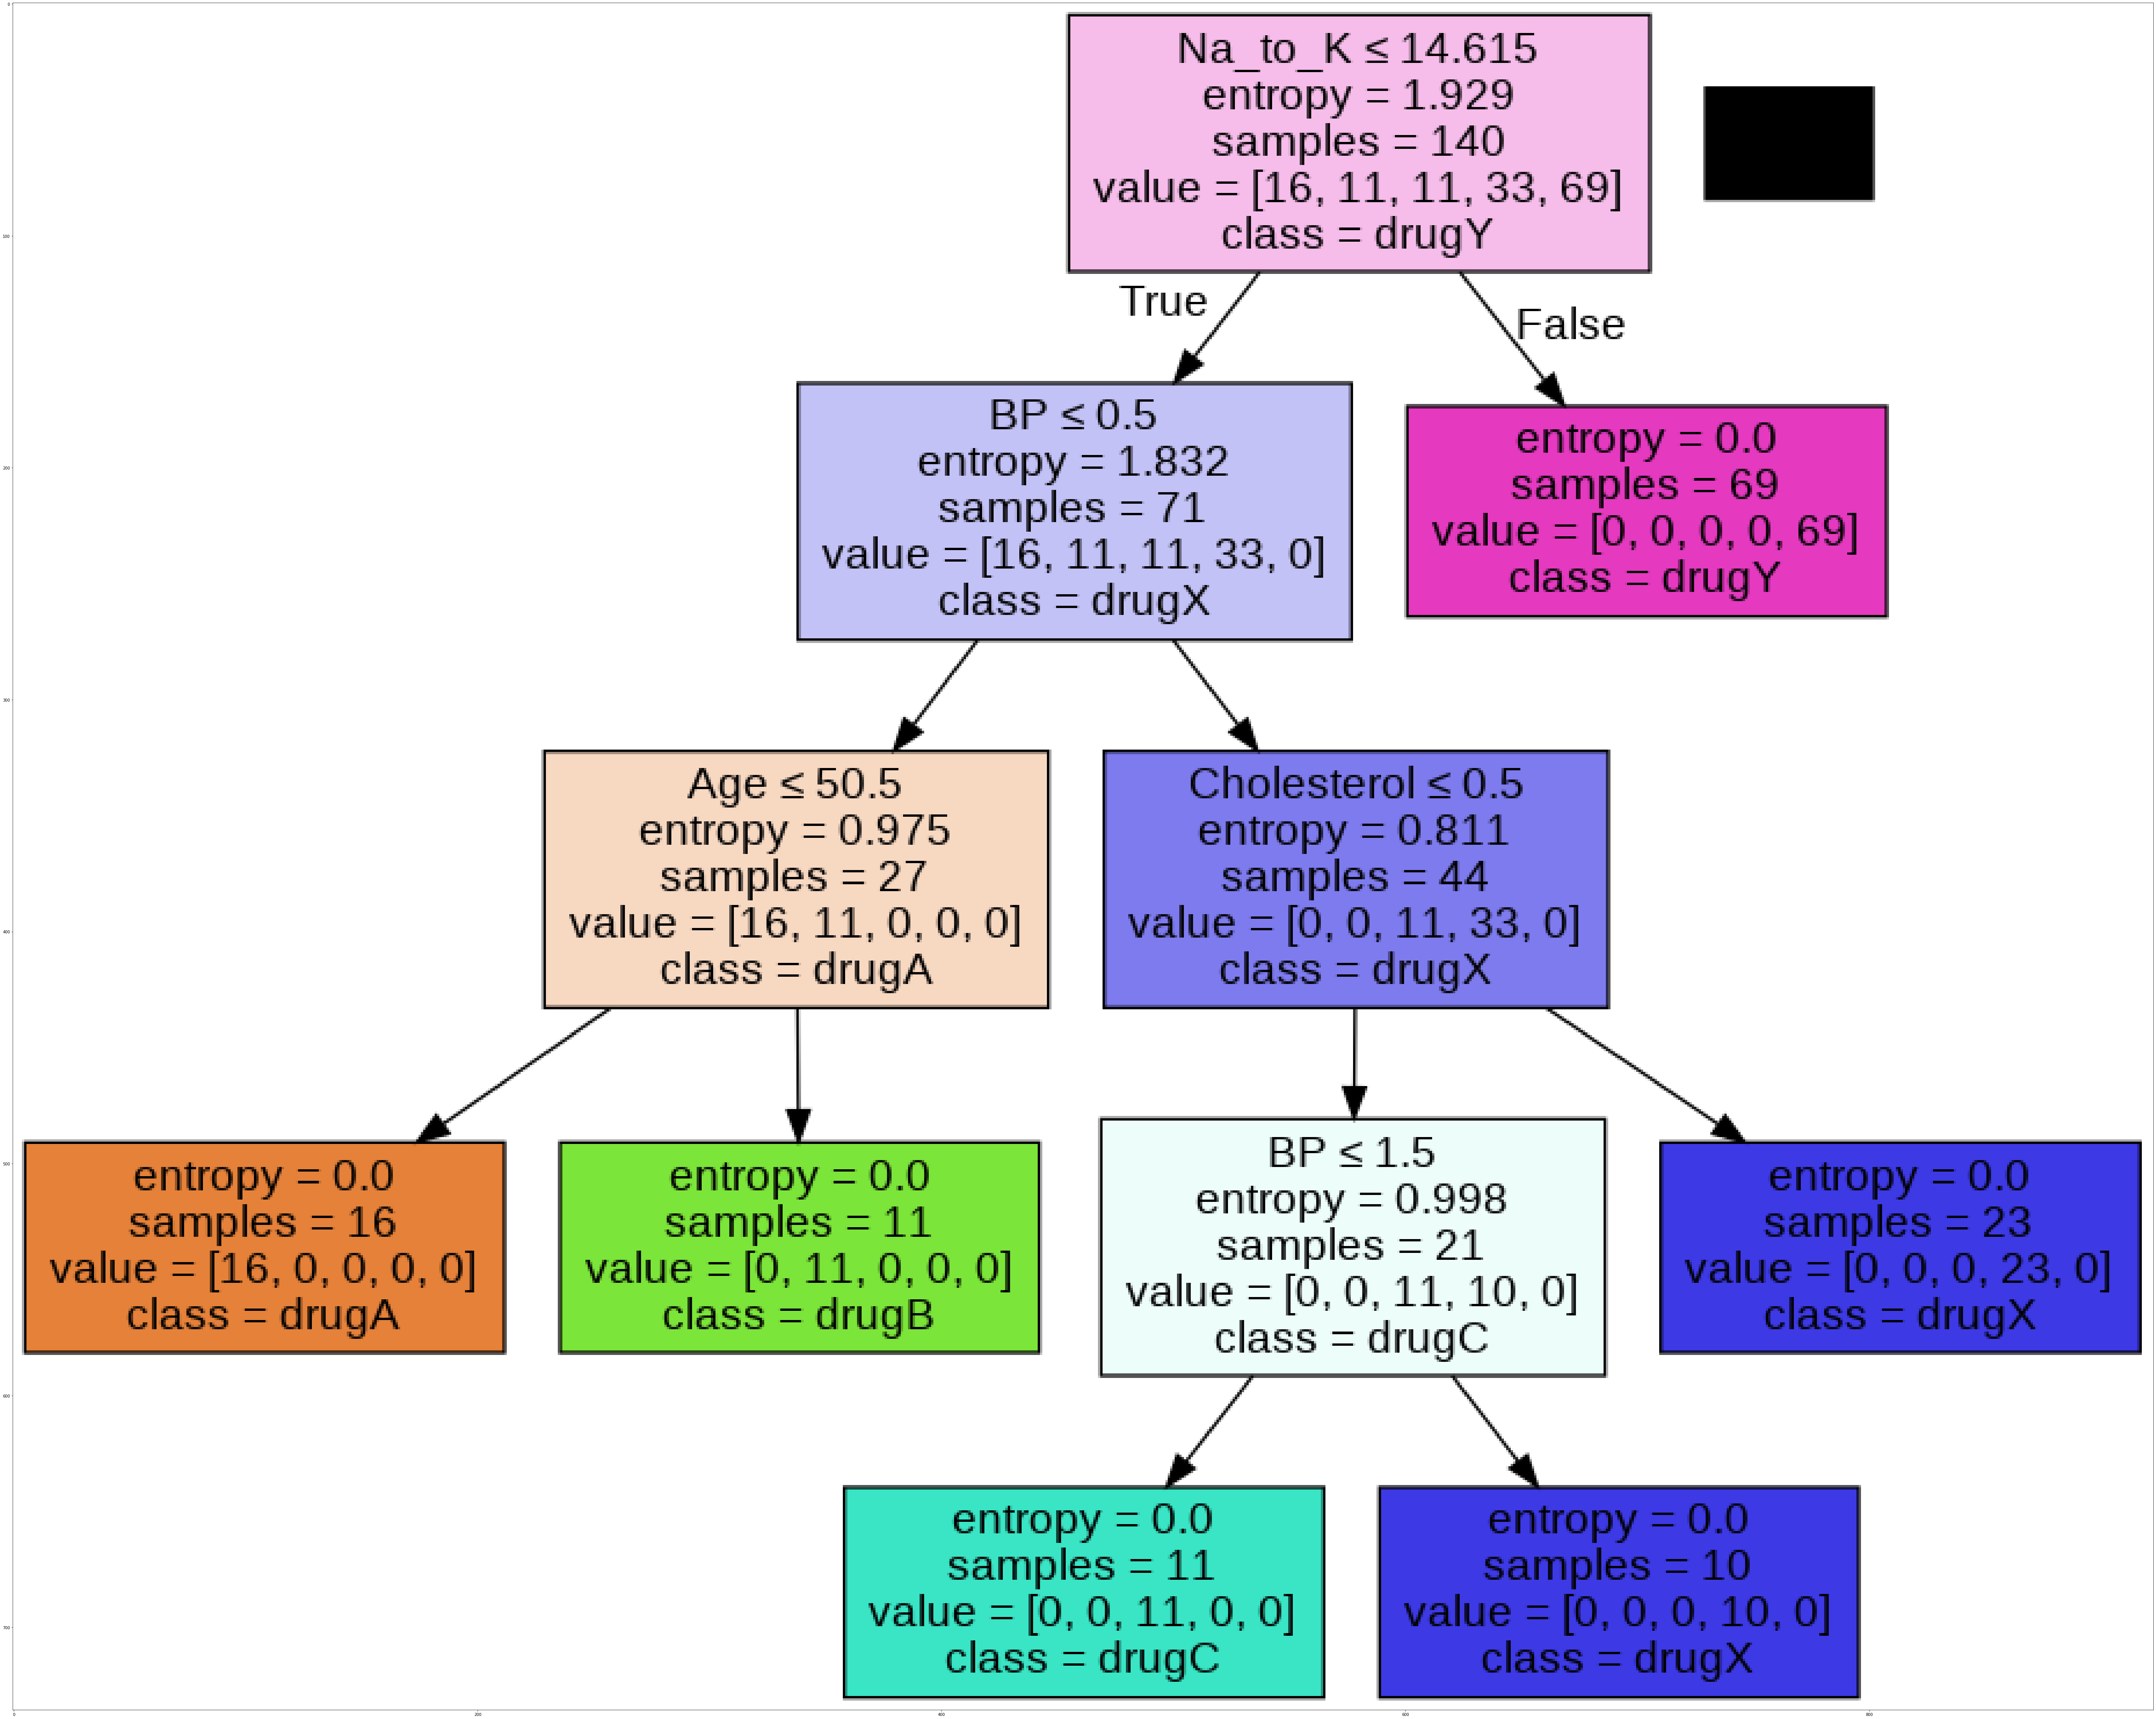

In [61]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames =data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')